# Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Chargement des données

In [4]:
def loadData(filename="./data"):
    f = open(filename, 'r')
    x = []
    y = []
    for l in f.readlines():
        l = l[:-2].split(':')
        x.append(l[1].split(';'))
        y.append(l[2].split(';'))
    return np.array(x,float), np.array(y,float)    

# Mesures

In [5]:
def evaluate(actions, y):
    t = actions.shape[0]
    regret = np.zeros((t))
    gain = np.zeros((t))
    for i in xrange(t):
        gain[i] = y[i][actions[i]]
        regret[i] = y[i].max() - gain[i]
    return gain, regret

# Baselines

## Strategie Random

In [6]:
def strategieRandom(x, y):
    return np.random.randint(0, y.shape[1], y.shape[0])

## Strategie StaticBest

In [7]:
def strategieStaticBest(x, y):
    return np.ones((len(y)), int) * y.sum(0).argmax()

## Strategie Optimale

In [8]:
def strategieOptimale(x, y):
    return y.argmax(1)

# UCB

In [9]:
def UCB(x, y):
    actions = np.zeros((y.shape[0]), int)
    cum = np.zeros((y.shape[1]))
    count = np.ones((y.shape[1]))
    mu = np.zeros((y.shape[1]))
    for i in xrange(0,y.shape[0]):
        b = mu + np.sqrt(2 * np.log(i+1) / count)
        actions[i] = b.argmax()
        cum[actions[i]] += y[i][actions[i]]
        count[actions[i]] += 1
        mu[actions[i]] = cum[actions[i]] / count[actions[i]]
    return actions

# LinUCB

In [76]:
def LinUCB(x, y, alpha=0.5):
    d = x.shape[1]
    actions = np.zeros((x.shape[0]), int)
    a = np.eye(d).reshape(1,d,d).repeat(y.shape[1],axis=0)
    b = np.zeros((y.shape[1],d))
    theta = np.zeros((y.shape[1],d))
    p = np.zeros((y.shape[1]))
    for i in xrange(0,x.shape[0]):
        for k in xrange(y.shape[1]):
            inva = np.linalg.inv(a[k])
            theta[k] = inva.dot(b[k])
            p[k] = theta[k].dot(x[i]) + alpha * np.sqrt(x[i].dot(inva.dot(x[i])))
        actions[i] = np.random.choice(np.where(p == p.max())[0])
        a[actions[i]] += x[i].dot(x[i])
        b[actions[i]] += y[i][actions[i]] * x[i]
    return actions

# Experiences

In [11]:
x,y = loadData()

In [12]:
actionsRandom = strategieRandom(x,y)
gRandom,rRandom = evaluate(actionsRandom,y)
print "gain:  ", gRandom.mean()
print "regret:", rRandom.mean()

gain:   0.0809955544721
regret: 0.225405092675


In [13]:
actionsStaticBest = strategieStaticBest(x,y)
gStaticBest,rStaticBest = evaluate(actionsStaticBest,y)
print "gain:  ", gStaticBest.mean()
print "regret:", rStaticBest.mean()

gain:   0.267927006209
regret: 0.0384736409378


In [14]:
actionsOptimale = strategieOptimale(x,y)
gOptimale,rOptimale = evaluate(actionsOptimale,y)
print "gain:  ", gOptimale.mean()
print "regret:", rOptimale.mean()

gain:   0.306400647147
regret: 0.0


In [15]:
actionsUCB = UCB(x,y)
gUCB,rUCB = evaluate(actionsUCB,y)
print "gain:  ", gUCB.mean()
print "regret:", rUCB.mean()

gain:   0.20141435233
regret: 0.104986294817


In [77]:
actionsLinUCB = LinUCB(x,y, .1)
gLinUCB,rLinUCB = evaluate(actionsLinUCB,y)
print "gain:  ", gLinUCB.mean()
print "regret:", rLinUCB.mean()

gain:   0.254105668411
regret: 0.0522949787364


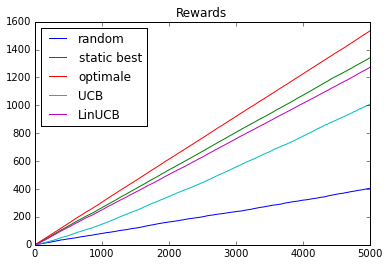

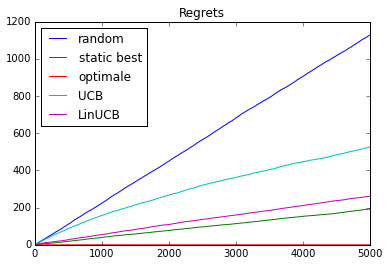

In [78]:
t = range(len(x))

plt.figure()
plt.plot(t, gRandom.cumsum(), label='random')
plt.plot(t, gStaticBest.cumsum(), label='static best')
plt.plot(t, gOptimale.cumsum(), label='optimale')
plt.plot(t, gUCB.cumsum(), label='UCB')
plt.plot(t, gLinUCB.cumsum(), label='LinUCB')
plt.title('Rewards')
plt.legend(loc=0)

plt.figure()
plt.plot(t, rRandom.cumsum(), label='random')
plt.plot(t, rStaticBest.cumsum(), label='static best')
plt.plot(t, rOptimale.cumsum(), label='optimale')
plt.plot(t, rUCB.cumsum(), label='UCB')
plt.plot(t, rLinUCB.cumsum(), label='LinUCB')
plt.title('Regrets')
plt.legend(loc=0)

In [25]:
(actionsLinUCB == 3).sum()

2009

In [23]:
actionsStaticBest

array([3, 3, 3, ..., 3, 3, 3])